# LinearRegression 클래스 - Ordinary Least Squares

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다. LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다.

        class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

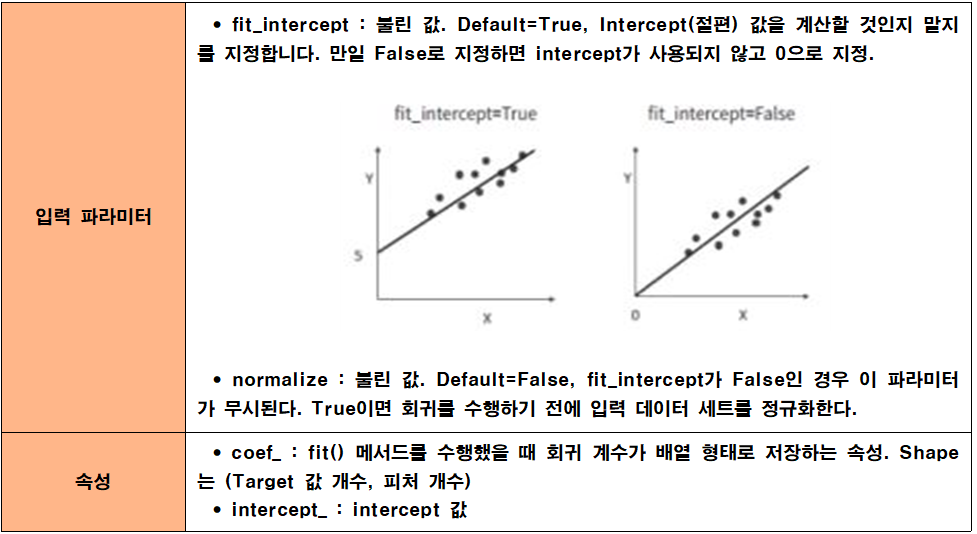

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다.

**피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감 = 다중 공선정(multi-collinearity) 문제**

일반적으로 상관간계가 높은 피처가 많은 경우 독립적인 중요 피처만 남기고 제거하거나 규제를 적용. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것을 고려.

# 회귀 평가 지표

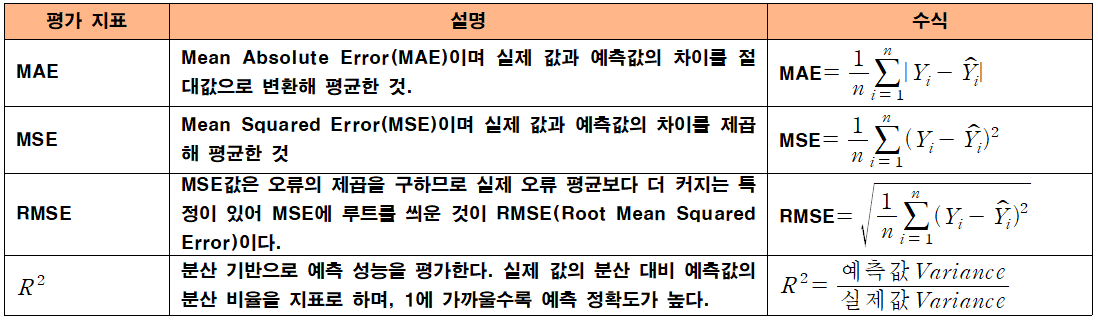

이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용한다.

사이킷런은 RMSE를 제공하지 않아, MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야한다.



### 사이킷런 회귀 평가 API

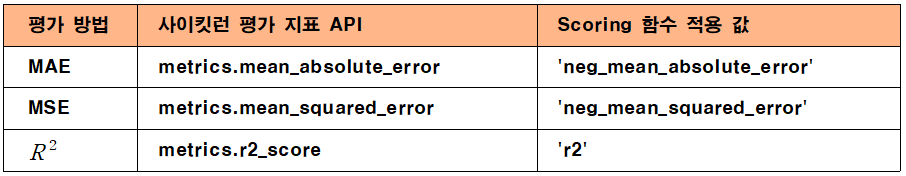



# LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

사이킷런 내장 데이터 세트인 보스턴 주택 가격 데이터의 해당 피처 설명

* CRIM : 지역별 범죄 발생률
* ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더비 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 수 있는  방 개수
* AGE : 1940년 이전에 건축된 소유 주택의 비율
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유의 주택 가격(중앙값)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열 = 주택 가격. 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE']  = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
print(bostonDF.columns)
bostonDF.info()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화하여, 총 8개의 칼럼('RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD')에 대해 값이 증가할수록 PRICE값이 어떻게 변하는지 확인.

Seaborn의 regplot() API는 X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다. matplotlib.subplots()를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현.

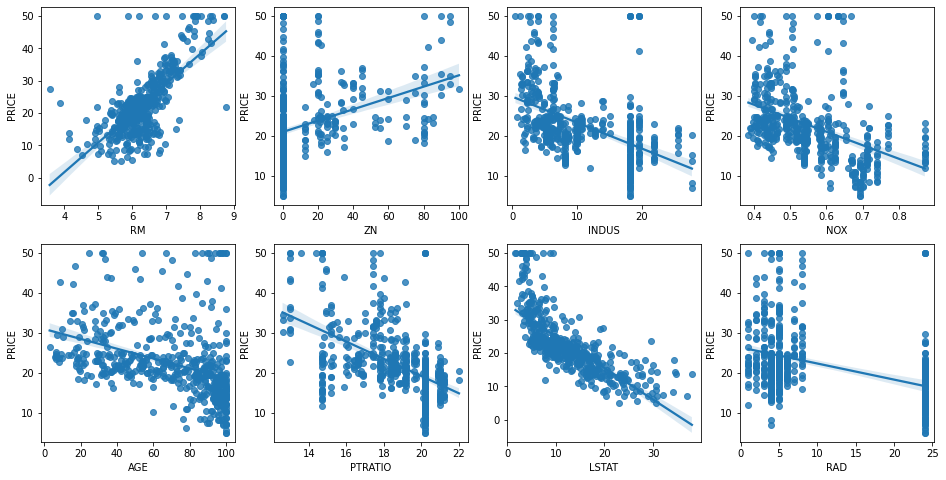

In [3]:
# 2개의 행과 4개의 열을 가진 subplots()를 이용. ax는 4 * 2개의 ax를 가짐
fig, ax = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=ax[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 잘 나타난다. RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가한다.

LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다. LSTAT이 적을수록 PRICE가 증가한다.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [6]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [7]:
print('절편 값 :',lr.intercept_)
print('회귀 계수 값 :',np.round(lr.coef_, 1))

절편 값 : 40.995595172164755
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
# coef_는 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수값으로 다시 매핑하고, 높은 값 순으로 출력.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다.

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보자. 사이킷런은 cross_val_score()를 이용할텐데, RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야한다. 

cross_val_score()의 인자로 'neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수이다. 

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829
